## Exploracion del dataframe de la funcion loader.py

In [25]:
# Cargar librerias

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Importar la funcion desde loader.py

In [26]:
excel_path = r"D:\asocio25-resultados\notebooks\combined_results.xlsx"

df = pd.read_excel(excel_path)
df.head()

,Empleado,Día,Escritorio,Zona,Instance
0,E0,L,D26,Z8,instance10
1,E0,Mi,D26,Z8,instance10
2,E1,L,D25,Z8,instance10
3,E1,Mi,D25,Z8,instance10
4,E10,Mi,D19,Z6,instance10


In [28]:
# Suponiendo que ya tienes el DataFrame df cargado con los datos mostrados

# Primero, normalizamos los nombres de las instancias para que sean consistentes
df['Instance'] = df['Instance'].str.lower()

# Diccionario para mapear abreviaciones de días a nombres completos
dias_mapping = {
    'L': 'Lunes',
    'Ma': 'Martes',
    'Mi': 'Miércoles',
    'J': 'Jueves',
    'V': 'Viernes',
    'S': 'Sábado',
    'D': 'Domingo'
}

# Convertir las abreviaciones de días a nombres completos
df['Día'] = df['Día'].map(dias_mapping)

# Obtener todas las instancias únicas en los datos
instancias = df['Instance'].unique()

# Diccionario para almacenar los resultados
resultados = {}

# Procesar cada instancia
for instance in instancias:
    # Filtrar datos para la instancia actual
    df_instance = df[df['Instance'] == instance]
    
    # Obtener lista de empleados únicos en esta instancia
    empleados_totales = df_instance['Empleado'].unique()
    total_empleados = len(empleados_totales)
    
    # Diccionario para almacenar resultados de esta instancia
    resultados_instance = {}
    
    # Procesar cada día de la semana
    for dia_nombre in dias_mapping.values():
        # Empleados que asistieron este día
        asistentes = df_instance[df_instance['Día'] == dia_nombre]['Empleado'].unique()
        total_asistentes = len(asistentes)
        
        # Empleados que no asistieron este día
        total_no_asistentes = total_empleados - total_asistentes
        
        # Almacenar resultados
        resultados_instance[dia_nombre] = {
            'Asistieron': total_asistentes,
            'No_asistieron': total_no_asistentes,
            'Total_empleados': total_empleados
        }
    
    # Almacenar resultados de esta instancia
    resultados[instance] = resultados_instance

# Mostrar resultados de forma organizada
for instance, datos in resultados.items():
    print(f"\nResultados para {instance}:")
    print("-" * 30)
    print(f"Total empleados en {instance}: {next(iter(datos.values()))['Total_empleados']}")
    print("\nAsistencias por día:")
    for dia, valores in datos.items():
        print(f"{dia}: Asistieron {valores['Asistieron']} - No asistieron {valores['No_asistieron']}")
    print("-" * 30)

# Si quieres acceder a los datos programáticamente:
# resultados['instance10']['Lunes']['Asistieron'] te daría el número de asistentes el lunes en instance10


Resultados para instance10:
------------------------------
Total empleados en instance10: 91

Asistencias por día:
Lunes: Asistieron 29 - No asistieron 62
Martes: Asistieron 26 - No asistieron 65
Miércoles: Asistieron 33 - No asistieron 58
Jueves: Asistieron 28 - No asistieron 63
Viernes: Asistieron 32 - No asistieron 59
Sábado: Asistieron 0 - No asistieron 91
Domingo: Asistieron 0 - No asistieron 91
------------------------------

Resultados para instance1:
------------------------------
Total empleados en instance1: 20

Asistencias por día:
Lunes: Asistieron 6 - No asistieron 14
Martes: Asistieron 8 - No asistieron 12
Miércoles: Asistieron 9 - No asistieron 11
Jueves: Asistieron 6 - No asistieron 14
Viernes: Asistieron 7 - No asistieron 13
Sábado: Asistieron 0 - No asistieron 20
Domingo: Asistieron 0 - No asistieron 20
------------------------------

Resultados para instance2:
------------------------------
Total empleados en instance2: 19

Asistencias por día:
Lunes: Asistieron 6 -

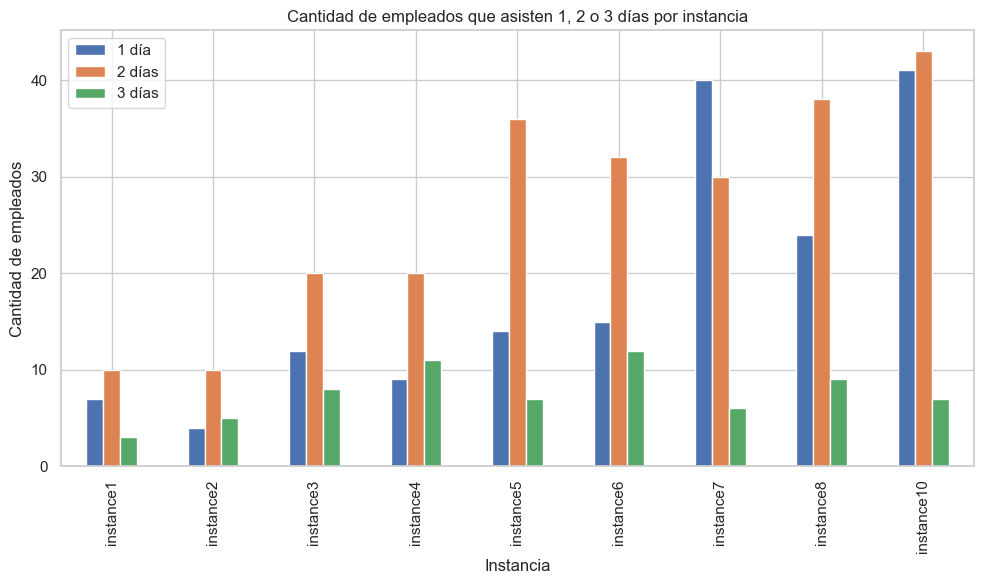

In [45]:
# Reordenar para que instance10 salga de última
orden_instancias = [inst for inst in conteo_dias_123.index if inst != 'instance10'] + ['instance10']
conteo_dias_123 = conteo_dias_123.loc[orden_instancias]

# Graficar
conteo_dias_123.plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel('Instancia')
plt.ylabel('Cantidad de empleados')
plt.title('Cantidad de empleados que asisten 1, 2 o 3 días por instancia')
plt.legend(['1 día', '2 días', '3 días'])
plt.tight_layout()
plt.show()


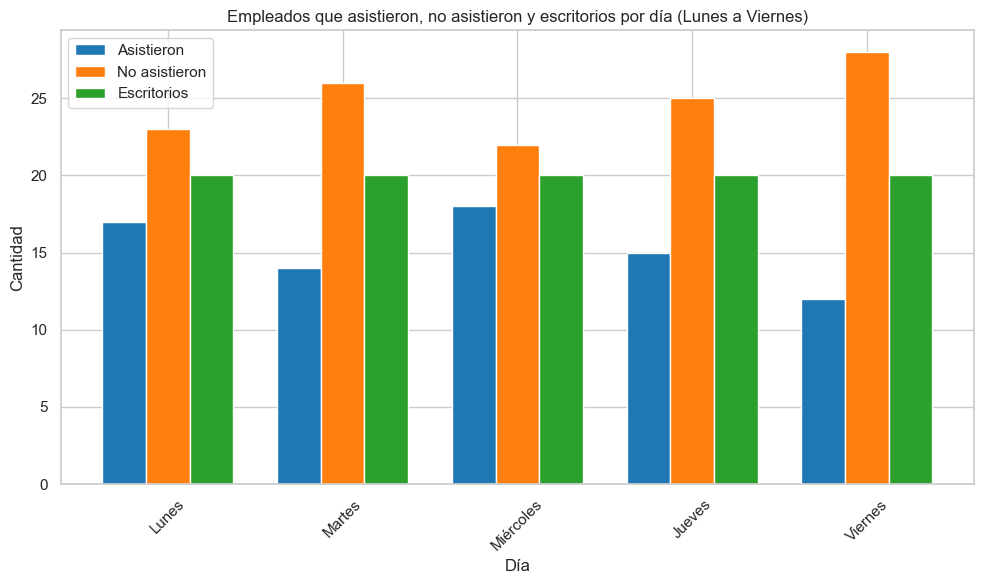

In [43]:
# Graficar barras para la instancia3 mostrando solo de lunes a viernes: Asistieron, No asistieron y Escritorios
fig, ax = plt.subplots(figsize=(10, 6))

dias_lab = dias[:5]  # Solo lunes a viernes
asistieron_vals = asistieron.loc[dias_lab].values
no_asistieron_vals = no_asistieron.loc[dias_lab].values
escritorios_vals = [resumen.loc['instance3', 'Escritorios']] * len(dias_lab)

bar_width = 0.25
x = range(len(dias_lab))

bar1 = ax.bar(x, asistieron_vals, width=bar_width, label='Asistieron', color='tab:blue')
bar2 = ax.bar([i + bar_width for i in x], no_asistieron_vals, width=bar_width, label='No asistieron', color='tab:orange')
bar3 = ax.bar([i + 2 * bar_width for i in x], escritorios_vals, width=bar_width, label='Escritorios', color='tab:green')

ax.set_xlabel('Día')
ax.set_ylabel('Cantidad')
ax.set_title('Empleados que asistieron, no asistieron y escritorios por día (Lunes a Viernes)')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(dias_lab, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

In [41]:
# Calcular el porcentaje promedio de uso de escritorios por instancia
porcentaje_promedio_uso = porcentaje_uso.groupby('Instance')['Porcentaje_uso'].mean()

# Mostrar el resultado
porcentaje_promedio_uso


Instance
instance1     79.500000
instance10    69.483568
instance2     87.000000
instance3     76.000000
instance4     82.000000
instance5     60.666667
instance6     65.666667
instance7     65.555556
instance8     67.361111
Name: Porcentaje_uso, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_12604\3297036313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empleados_por_instance.index, y=empleados_por_instance.values, palette='viridis')


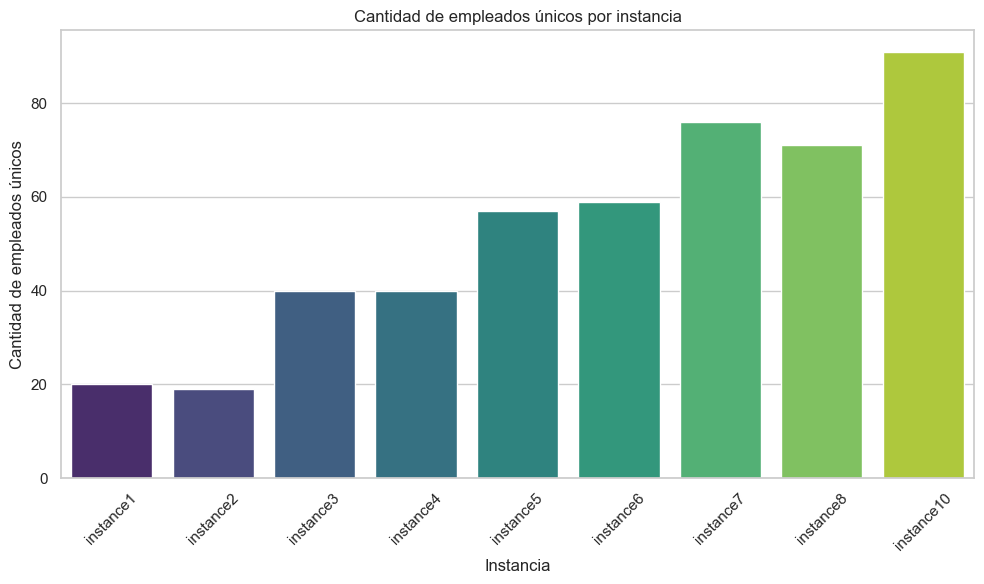

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=empleados_por_instance.index, y=empleados_por_instance.values, palette='viridis')
plt.xlabel('Instancia')
plt.ylabel('Cantidad de empleados únicos')
plt.title('Cantidad de empleados únicos por instancia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Calcular métricas por instancia sin la columna 'Grupos'
resumen = pd.DataFrame(index=orden)
resumen['Empleados'] = df.groupby('Instance')['Empleado'].nunique()
resumen['Zonas'] = df.groupby('Instance')['Zona'].nunique()
resumen['Escritorios'] = df.groupby('Instance')['Escritorio'].nunique()

# Número de variables de decisión: Empleados x Escritorios
resumen['Variables_decision'] = resumen['Empleados'] * resumen['Escritorios']

# Guardar en Excel en la carpeta output
os.makedirs('output', exist_ok=True)
resumen.to_excel('output/resumen_instancias.xlsx')
resumen


,Empleados,Zonas,Escritorios,Variables_decision
instance1,20,2,9,180
instance2,19,2,9,171
instance3,40,4,20,800
instance4,40,4,20,800
instance5,57,6,35,1995
instance6,59,6,35,2065
instance7,76,10,40,3040
instance8,71,10,39,2769
instance10,91,15,45,4095


In [12]:
# Crear un DataFrame con la hoja 'Reuniones_Combinadas'
df_reuniones = pd.read_excel(excel_path, sheet_name='Reuniones_Combinadas')
df_reuniones

,Grupo,Día de Reunión,Instance
0,G0,L,instance10
1,G1,J,instance10
2,G2,L,instance10
3,G3,L,instance10
4,G4,V,instance10
...,...,...,...
71,G7,V,instance8
72,G8,V,instance8
73,G9,Ma,instance8
74,G10,Ma,instance8


In [14]:
# Crear una tabla que muestre si todos los grupos de cada instancia tuvieron reunión
# Comparamos grupos_por_instance (total de grupos) vs grupos_con_reunion (grupos con reunión)
todos_tuvieron_reunion = (grupos_por_instance == grupos_con_reunion).rename('Todos_tuvieron_reunion')

# Unir con el resumen para mostrar más información
tabla_reuniones = resumen.join([grupos_por_instance.rename('Total_grupos'), 
                                grupos_con_reunion.rename('Grupos_con_reunion'), 
                                todos_tuvieron_reunion])

tabla_reuniones[['Total_grupos', 'Grupos_con_reunion', 'Todos_tuvieron_reunion']]

,Total_grupos,Grupos_con_reunion,Todos_tuvieron_reunion
instance1,4,4,True
instance2,4,4,True
instance3,5,5,True
instance4,5,5,True
instance5,8,8,True
instance6,8,8,True
instance7,12,12,True
instance8,12,12,True
instance10,18,18,True


<Figure size 1000x600 with 0 Axes>

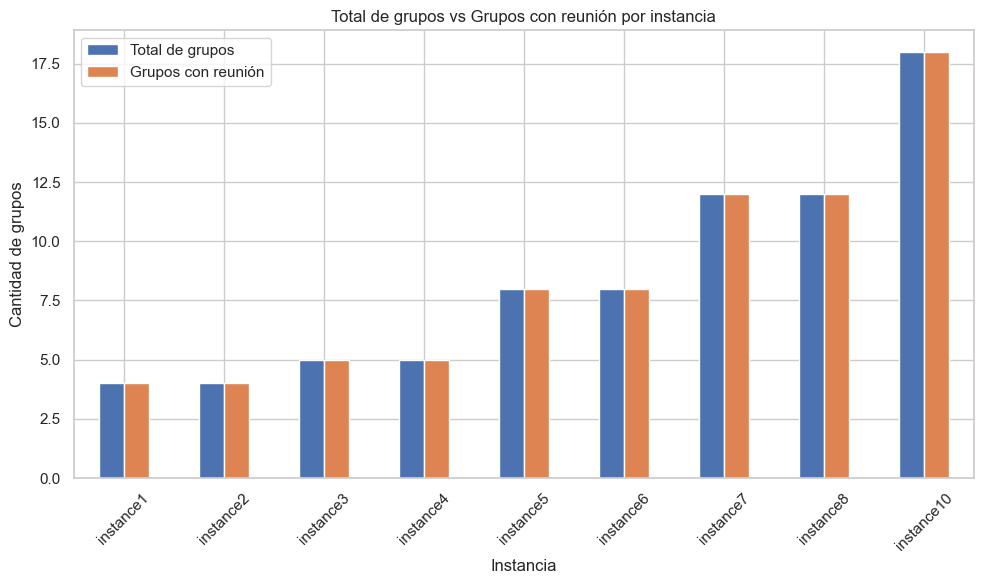

In [48]:
plt.figure(figsize=(10, 6))
tabla_reuniones[['Total_grupos', 'Grupos_con_reunion']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Instancia')
plt.ylabel('Cantidad de grupos')
plt.title('Total de grupos vs Grupos con reunión por instancia')
plt.xticks(rotation=45)
plt.legend(['Total de grupos', 'Grupos con reunión'])
plt.tight_layout()
plt.show()


In [19]:
# Calcular el porcentaje de escritorios usados vs empleados por instancia
# Para cada instancia: porcentaje = (escritorios / empleados) * 100

tabla_porcentaje = resumen[['Empleados', 'Escritorios']].copy()
tabla_porcentaje['Porcentaje_escritorios_usados'] = (tabla_porcentaje['Escritorios'] / tabla_porcentaje['Empleados']) * 100

# Mostrar la tabla con el porcentaje
tabla_porcentaje[['Empleados', 'Escritorios', 'Porcentaje_escritorios_usados']]

,Empleados,Escritorios,Porcentaje_escritorios_usados
instance1,20,9,45.000000
instance2,19,9,47.368421
instance3,40,20,50.000000
instance4,40,20,50.000000
instance5,57,35,61.403509
instance6,59,35,59.322034
instance7,76,40,52.631579
instance8,71,39,54.929577
instance10,91,45,49.450549


<Figure size 1200x600 with 0 Axes>

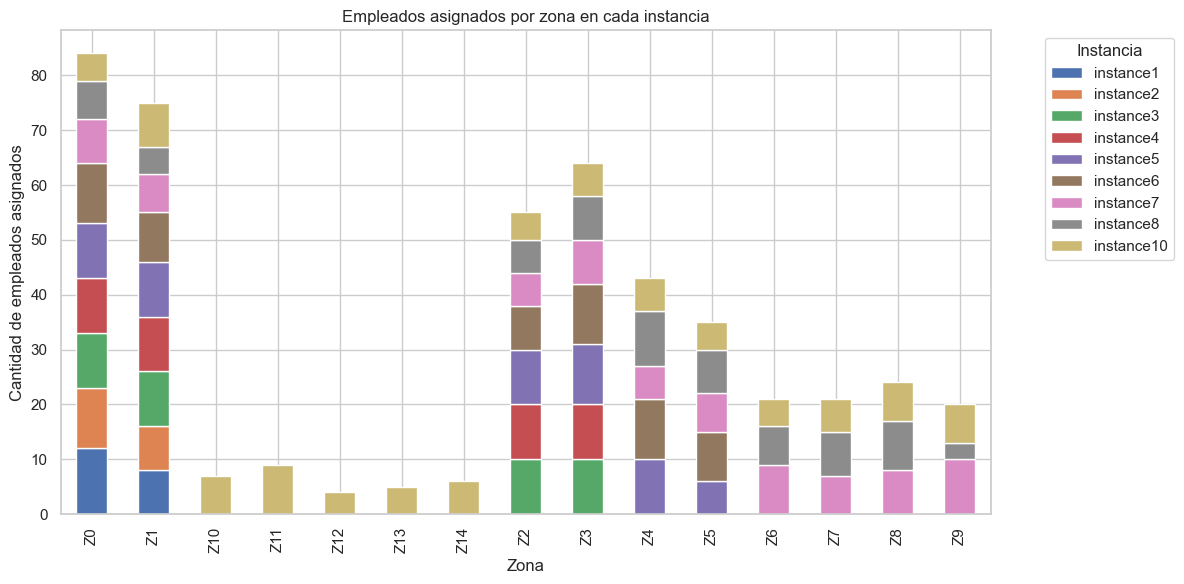

In [50]:
# Reordenar para que instance10 salga de última en el gráfico de zonas por instancia

orden_instancias_zonas = [inst for inst in zonas_por_instance.index if inst != 'instance10'] + ['instance10']
zonas_por_instance_reordenado = zonas_por_instance.loc[orden_instancias_zonas]

plt.figure(figsize=(12, 6))
zonas_por_instance_reordenado.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Zona')
plt.ylabel('Cantidad de empleados asignados')
plt.title('Empleados asignados por zona en cada instancia')
plt.legend(title='Instancia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
# Calcular proporciones de virtualidad y asistencia para cada instancia (sin la proporción de escritorios)

proporciones = []

for inst in resumen.index:
    empleados = resumen.loc[inst, 'Empleados']
    total_asistencias = asistieron_semanal.get(inst, 0)
    # Empleados que nunca asistieron (virtuales)
    empleados_virtuales = empleados - (asistieron_dias.loc[inst] > 0).sum()
    # Proporción de empleados virtuales
    prop_virtuales = empleados_virtuales / empleados if empleados > 0 else 0
    # Proporción de asistencia semanal (asistencias posibles = empleados * 5 días hábiles)
    asistencia_posible = empleados * 5
    prop_asistencia = total_asistencias / asistencia_posible if asistencia_posible > 0 else 0

    proporciones.append({
        'Instancia': inst,
        'Empleados': empleados,
        'Virtuales': empleados_virtuales,
        'Prop_virtuales': prop_virtuales,
        'Prop_asistencia': prop_asistencia
    })

proporciones_df = pd.DataFrame(proporciones).set_index('Instancia')
proporciones_df[['Empleados', 'Virtuales', 'Prop_virtuales', 'Prop_asistencia']]


,Empleados,Virtuales,Prop_virtuales,Prop_asistencia
Instancia,,,,
instance1,20,15,0.750000,0.360000
instance2,19,14,0.736842,0.410526
instance3,40,35,0.875000,0.380000
instance4,40,35,0.875000,0.410000
instance5,57,52,0.912281,0.375439
instance6,59,54,0.915254,0.389831
instance7,76,71,0.934211,0.310526
instance8,71,66,0.929577,0.357746
instance10,91,86,0.945055,0.325275
